In [542]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [543]:
housing_df = pd.read_csv("/home/my_repos/learning-projects/ml-zoomcamp/data/housing.csv")

In [544]:
housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [545]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [547]:
df = housing_df[housing_df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]
df = df.reset_index(drop=True)
df['ocean_proximity'] = df['ocean_proximity'].apply(lambda x: 0 if x == 'INLAND' else 1)

In [548]:
df.ocean_proximity.value_counts()

ocean_proximity
1    9136
0    6551
Name: count, dtype: int64

In [549]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,1
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,1
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,1
3,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,1
4,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,1


In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15687 entries, 0 to 15686
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15687 non-null  float64
 1   latitude            15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
 9   ocean_proximity     15687 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [551]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [552]:
df = df.fillna(0)

In [553]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<Axes: xlabel='median_house_value', ylabel='Count'>

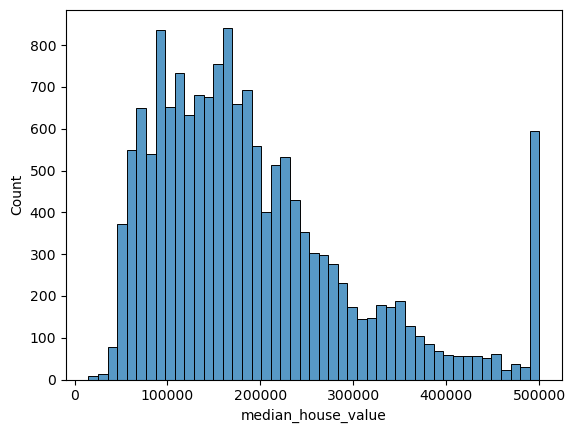

In [554]:
sns.histplot(data=df.median_house_value)

In [555]:
df.median_house_value.describe().round(2)

count     15687.00
mean     191943.02
std      108801.08
min       14999.00
25%      111300.00
50%      166900.00
75%      241100.00
max      500001.00
Name: median_house_value, dtype: float64

<Axes: xlabel='median_house_value', ylabel='Count'>

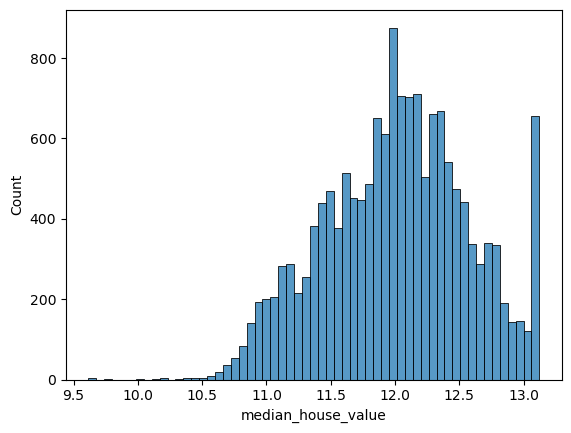

In [556]:
sns.histplot(np.log1p(df.median_house_value))

In [557]:
df.median_house_value = np.log1p(df.median_house_value)

In [558]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,12.973866,1
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,12.287657,1
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,12.419574,1
3,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,12.554971,1
4,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,12.287196,1


#### Split dataset
    train / val / test
    60 / 20 / 20

In [559]:
from sklearn.model_selection import train_test_split

In [560]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [561]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [562]:
print(df_full_train.shape, df_val.shape, df_test.shape)

(12549, 10) (3138, 10) (3138, 10)


In [563]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [564]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [565]:
y_train

array([11.80634853, 12.68168862, 11.61187447, ..., 11.46374572,
       11.93032573, 10.92054627])

In [566]:
y_val

array([12.09122841, 12.14153946, 11.47834437, ..., 12.61686023,
       11.03651737, 11.65182617])

In [567]:
y_test

array([12.76082233, 11.39415319, 11.21587969, ..., 11.22791981,
       12.11615341, 12.48824331])

In [568]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [569]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [570]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import export_text

In [571]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']

train_dicts = df_train[columns].to_dict(orient='records')
val_dicts = df_val[columns].to_dict(orient='records')
test_dicts = df_test[columns].to_dict(orient='records')

In [573]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)

In [574]:
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [576]:
dt = DecisionTreeRegressor(max_depth=1)

dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [577]:
y_pred = dt.predict(X_val)

**Question 1**

    Which feature is used for splitting the data?

In [579]:
feature_names=list(dv.get_feature_names_out())

print(export_text(dt, feature_names=feature_names))

|--- ocean_proximity <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity >  0.50
|   |--- value: [12.30]



In [580]:
df_feature_importance = pd.DataFrame({'Feature': dv.feature_names_, 
                                      'Importance': dt.feature_importances_})

df_feature_importance

,Feature,Importance
0,households,0.0
1,housing_median_age,0.0
2,latitude,0.0
3,longitude,0.0
4,median_income,0.0
5,ocean_proximity,1.0
6,population,0.0
7,total_bedrooms,0.0
8,total_rooms,0.0


In [581]:
# Get the feature importances
feature_importances = dt.feature_importances_

# Create a DataFrame to display the results
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or inspect the feature importances
print(feature_importance_df)


              Feature  Importance
5     ocean_proximity         1.0
0          households         0.0
1  housing_median_age         0.0
2            latitude         0.0
3           longitude         0.0
4       median_income         0.0
6          population         0.0
7      total_bedrooms         0.0
8         total_rooms         0.0


In [582]:
print(export_text(dt, feature_names=list(feature_names)))

|--- ocean_proximity <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity >  0.50
|   |--- value: [12.30]



**Question 2 - Random Forest Regressor**

        What's the RMSE of this model on validation?

In [583]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [584]:
rf = RandomForestRegressor(n_estimators=10,
                            random_state=1,
                            n_jobs=-1)

In [585]:
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

In [586]:
rmse.round(5)

0.24579

**Question 3**

    Now let's experiment with the `n_estimators` parameter

In [587]:
scores = []

n_estimators = np.arange(10, 210, 10)

for n in n_estimators:

    rf = RandomForestRegressor(n_estimators=n,
                                random_state=1,
                                n_jobs=-1)
    
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))

    scores.append([n, rmse.round(4)])


In [588]:
columns = ['n_estimators', 'rmse']
scores = pd.DataFrame(scores, columns=columns)

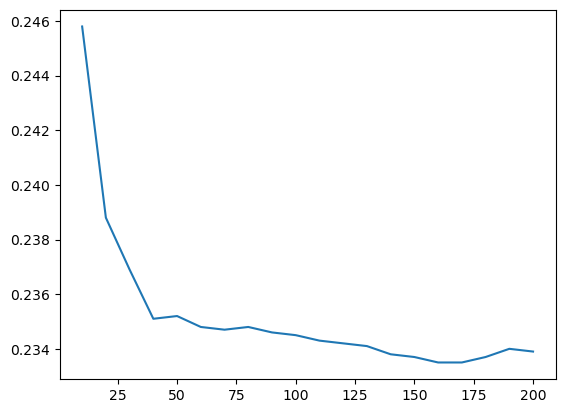

In [589]:
plt.plot(scores.n_estimators, scores.rmse)
plt.show()

Lower RMSE values indicate better model performance. After n_estimator: 50, the model stop to improve.

**Question 4**

    - Try different values of `max_depth`: `[10, 15, 20, 25]`
    - For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
    - Fix the random seed: `random_state=1`

    What's the best `max_depth`?

In [590]:
scores = []

max_depths = [10, 15, 20, 25]
n_estimators = np.arange(10, 70, 10)

for n in n_estimators:
    for d in max_depths:

        rf = RandomForestRegressor(n_estimators=n,
                                   max_depth=d,
                                    random_state=1,
                                    n_jobs=-1)

        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))

        scores.append([n, d, rmse.round(4)])

In [591]:
columns = ['n_estimators', 'max_depth', 'rmse']
scores = pd.DataFrame(scores, columns=columns)

In [592]:
# Find the min value for rmse
scores.loc[scores['rmse'].idxmin()]

n_estimators    60.0000
max_depth       20.0000
rmse             0.2347
Name: 22, dtype: float64

<Axes: xlabel='None-max_depth', ylabel='n_estimators'>

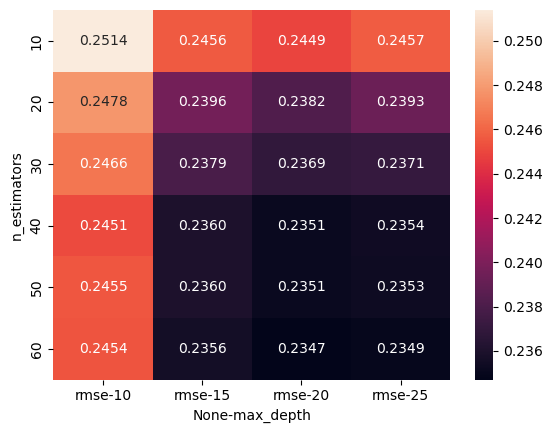

In [593]:
# Make a different visualization for better understanding
scores_pivot = scores.pivot(index='n_estimators', 
                                  columns=['max_depth'], 
                                  values=['rmse'])
scores_pivot

sns.heatmap(scores_pivot, annot=True, fmt='.4f')

The best max_depth is 20

**Question 5: Feature importance**

    We can extract feature importance information from tree-based models.

    At each step of the decision tree learning algorith, it finds the best split. When doint it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the imporatant features for tree-based models.

    What's the most important feature (among these 4)?

    total_rooms
    median_income
    total_bedrooms
    longitude


In [594]:
rf = RandomForestRegressor(n_estimators=10,
                           max_depth=20,
                           random_state=1,
                           n_jobs=-1)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)

In [595]:
feature_names=list(dv.get_feature_names_out())

# Get the feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to display the results
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or inspect the feature importances
print(feature_importance_df)

              Feature  Importance
5     ocean_proximity    0.366279
4       median_income    0.335908
2            latitude    0.103164
3           longitude    0.085156
1  housing_median_age    0.030113
6          population    0.027281
8         total_rooms    0.021592
7      total_bedrooms    0.015567
0          households    0.014941


From the option list, the most important feature is median_income

**Question 6: XGBoost model**

In [596]:
features = dv.get_feature_names_out()
features

array(['households', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity', 'population', 'total_bedrooms',
       'total_rooms'], dtype=object)

In [597]:
import xgboost as xgb

In [598]:
evals_result = {}

features = dv.get_feature_names_out()

dtrain = xgb.DMatrix(X_train,
                     label=y_train,
                     feature_names=features
                     )

In [599]:
evals_result = {}

features = dv.get_feature_names_out()

dtrain = xgb.DMatrix(X_train,
                     label=y_train,
                     feature_names=features
                     )

dval = xgb.DMatrix(X_val,
                label=y_val,
                feature_names=features)

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

watchlist = [(dtrain, 'train'), (dval, 'val')]

model = xgb.train(xgb_params,
                  dtrain=dtrain, 
                  num_boost_round=100,
                  evals=watchlist,
                  evals_result=evals_result,
                  verbose_eval=1
                  )

y_pred = model.predict(dval)

[0]	train-rmse:8.07362	val-rmse:8.07348
[1]	train-rmse:5.65832	val-rmse:5.65617
[2]	train-rmse:3.96917	val-rmse:3.96541
[3]	train-rmse:2.78836	val-rmse:2.78530
[4]	train-rmse:1.96409	val-rmse:1.96088
[5]	train-rmse:1.38983	val-rmse:1.38852
[6]	train-rmse:0.99273	val-rmse:0.99253
[7]	train-rmse:0.71854	val-rmse:0.72138
[8]	train-rmse:0.53440	val-rmse:0.54054
[9]	train-rmse:0.41016	val-rmse:0.42108
[10]	train-rmse:0.33195	val-rmse:0.34802
[11]	train-rmse:0.28413	val-rmse:0.30539
[12]	train-rmse:0.25487	val-rmse:0.28044
[13]	train-rmse:0.23748	val-rmse:0.26681
[14]	train-rmse:0.22789	val-rmse:0.25955
[15]	train-rmse:0.22197	val-rmse:0.25614
[16]	train-rmse:0.21543	val-rmse:0.25268
[17]	train-rmse:0.21034	val-rmse:0.24871
[18]	train-rmse:0.20688	val-rmse:0.24786
[19]	train-rmse:0.20341	val-rmse:0.24612
[20]	train-rmse:0.20036	val-rmse:0.24508
[21]	train-rmse:0.19827	val-rmse:0.24376
[22]	train-rmse:0.19644	val-rmse:0.24257
[23]	train-rmse:0.19320	val-rmse:0.24095
[24]	train-rmse:0.19203	va

[81]	train-rmse:0.12754	val-rmse:0.23025
[82]	train-rmse:0.12727	val-rmse:0.23015
[83]	train-rmse:0.12666	val-rmse:0.23024
[84]	train-rmse:0.12630	val-rmse:0.23028
[85]	train-rmse:0.12534	val-rmse:0.23010
[86]	train-rmse:0.12495	val-rmse:0.23009
[87]	train-rmse:0.12455	val-rmse:0.23004
[88]	train-rmse:0.12330	val-rmse:0.22953
[89]	train-rmse:0.12260	val-rmse:0.22949
[90]	train-rmse:0.12174	val-rmse:0.22957
[91]	train-rmse:0.12118	val-rmse:0.22940
[92]	train-rmse:0.12037	val-rmse:0.22914
[93]	train-rmse:0.11983	val-rmse:0.22921
[94]	train-rmse:0.11949	val-rmse:0.22909
[95]	train-rmse:0.11894	val-rmse:0.22906
[96]	train-rmse:0.11840	val-rmse:0.22906
[97]	train-rmse:0.11791	val-rmse:0.22898
[98]	train-rmse:0.11672	val-rmse:0.22891
[99]	train-rmse:0.11656	val-rmse:0.22897


In [600]:
model.get_score()

{'households': 709.0,
 'housing_median_age': 507.0,
 'latitude': 727.0,
 'longitude': 699.0,
 'median_income': 751.0,
 'ocean_proximity': 67.0,
 'population': 472.0,
 'total_bedrooms': 297.0,
 'total_rooms': 452.0}

In [601]:
model.best_iteration

99

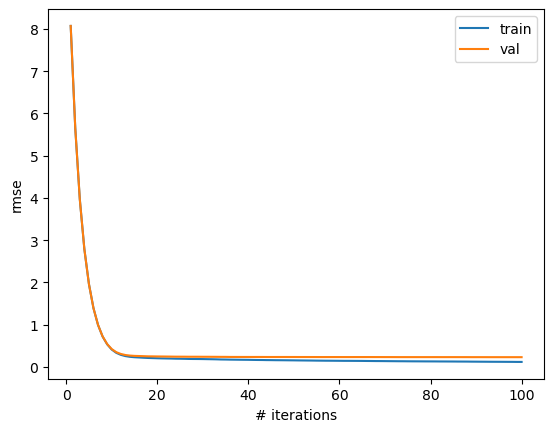

In [602]:
# Extract training and validation RMSE scores
columns = ['iter', 'train_rmse', 'val_rmse']
train_rmse = list(evals_result['train'].values())[0]
val_rmse = list(evals_result['val'].values())[0]

# Create a DataFrame for the scores
df_scores = pd.DataFrame(
    list(zip(
        range(1, len(train_rmse) + 1),
        train_rmse,
        val_rmse
    )), columns=columns)

# Plot the RMSE scores
plt.plot(df_scores.iter, df_scores.train_rmse, label='train')
plt.plot(df_scores.iter, df_scores.val_rmse, label='val')
plt.xlabel('# iterations')
plt.ylabel('rmse')
plt.legend()

Which eta leads to the best RMSE score on the validation dataset?


In [603]:
etas = [0.1, 0.3]

features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, 
                     label=y_train,
                     feature_names=features)
dval = xgb.DMatrix(X_val, 
                     label=y_val,
                     feature_names=features)

# Initialize a dictionary to store evaluation results
evals_result = {}

# Initialize lists to store AUC scores for each parameter
eta_scores = []

xgb_params = {
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

watchlist = [(dtrain, 'train'), (dval, 'val')]

for eta in etas:
    params = xgb_params.copy()
    params['eta'] = eta

    # Create and train the XGBoost model with the current eta value
    model = xgb.train(params=params,
                      dtrain=dtrain,
                      num_boost_round=100,
                      evals=watchlist,
                      evals_result=evals_result,
                      verbose_eval=1)

    # Get the AUC scores for each iteration
    rmse_scores = evals_result['val']['rmse']
    eta_scores.append(rmse_scores)

[0]	train-rmse:10.37456	val-rmse:10.37545
[1]	train-rmse:9.33895	val-rmse:9.33910
[2]	train-rmse:8.40699	val-rmse:8.40694
[3]	train-rmse:7.56827	val-rmse:7.56760
[4]	train-rmse:6.81351	val-rmse:6.81222
[5]	train-rmse:6.13433	val-rmse:6.13236
[6]	train-rmse:5.52318	val-rmse:5.52066
[7]	train-rmse:4.97329	val-rmse:4.97019
[8]	train-rmse:4.47854	val-rmse:4.47532
[9]	train-rmse:4.03346	val-rmse:4.03005
[10]	train-rmse:3.63299	val-rmse:3.62939
[11]	train-rmse:3.27269	val-rmse:3.26930
[12]	train-rmse:2.94855	val-rmse:2.94514
[13]	train-rmse:2.65703	val-rmse:2.65359
[14]	train-rmse:2.39479	val-rmse:2.39150
[15]	train-rmse:2.15901	val-rmse:2.15616
[16]	train-rmse:1.94714	val-rmse:1.94442
[17]	train-rmse:1.75677	val-rmse:1.75478
[18]	train-rmse:1.58567	val-rmse:1.58404
[19]	train-rmse:1.43206	val-rmse:1.43081
[20]	train-rmse:1.29412	val-rmse:1.29329
[21]	train-rmse:1.17023	val-rmse:1.17013
[22]	train-rmse:1.05934	val-rmse:1.05983
[23]	train-rmse:0.95998	val-rmse:0.96117
[24]	train-rmse:0.87015	

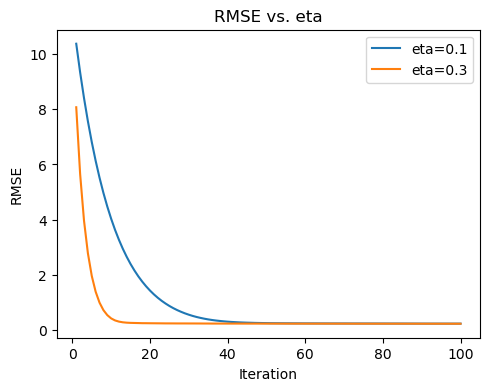

In [604]:
# Plot the AUC scores for each parameter
plt.figure(figsize=(12, 4))
plt.subplot(121)
for i, eta in enumerate(etas):
    plt.plot(range(1, len(eta_scores[i]) + 1), eta_scores[i], label=f'eta={eta}')
plt.title('RMSE vs. eta')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()

eta 0.3 leads to better model performance